# MNIST

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## RNN
### EDA

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

unique, counts = np.unique(y_train, return_counts=True)
print(f"Train labels: {dict(zip(unique, counts))}")

unique, counts = np.unique(y_test, return_counts=True)
print(f"Test labels: {dict(zip(unique, counts))}")

11490434/11490434 [==============================] - 2s 0us/step
Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [5]:
indexes = np.random.randint(0, x_train.shape[0], size=9)
"""
images = x_train[indexes]
labels = y_train[indexes]
"""

'\nimages = x_train[indexes]\nlabels = y_train[indexes]\n'

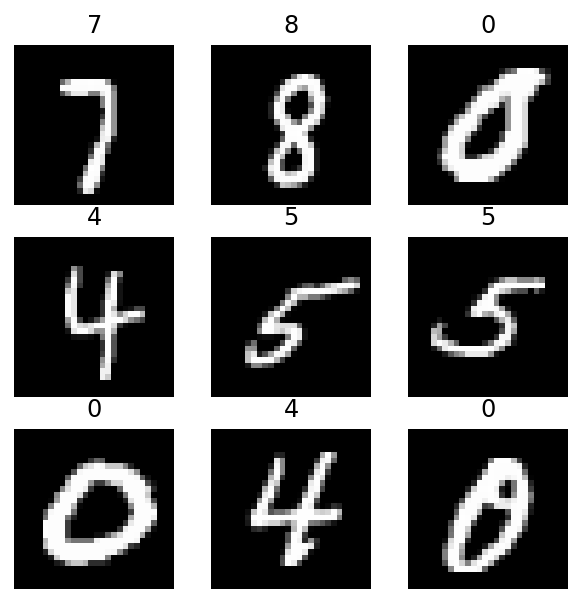

In [6]:
plt.figure(figsize=(5,5))
for idx, i in enumerate(indexes):
    plt.subplot(3,3,idx+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(y_train[i])
plt.show()

### Preprocessing

In [7]:
from keras.layers import Dense, Activation, SimpleRNN

In [8]:
num_labels = len(np.unique(y_train))

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size])
x_test = np.reshape(x_test, [-1, image_size, image_size])
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

input_shape = (image_size, image_size) #실제로 (timesteps, input_dim)
batch_size = 128
units = 256 #출력 유닛의 개수
dropout = 0.2
### RNN의 출력은 현재 입력 + 이전 출력 혹은 은닉 상태로 구성

In [9]:
def create_func_model():
    inputs = keras.Input(shape=input_shape)
    rnn1 = SimpleRNN(units=units,
                     dropout=dropout
                    )(inputs)
    outputs = Dense(num_labels,
                   activation='softmax'
                  )(rnn1)
    model = keras.models.Model(inputs, outputs)
    return model

In [10]:
func_model = create_func_model()
func_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 256)               72960     
                                                                 
 dense (Dense)               (None, 10)                2570      
                                                                 
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


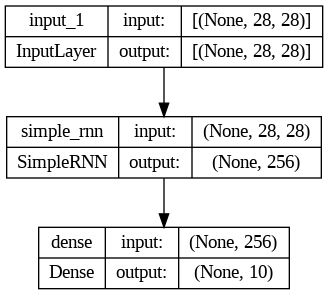

In [11]:
keras.utils.plot_model(model=func_model,
                       to_file='rnn-mnist.png',
                       show_shapes=True
                      )

In [12]:
learning_rate = 0.001
func_model.compile(loss='categorical_crossentropy',
                   optimizer=keras.optimizers.SGD(learning_rate=learning_rate),
                   metrics=['accuracy']
                  )

In [13]:
history = func_model.fit(x_train, y_train,
                         epochs=20,
                         batch_size=batch_size,
                         validation_data=(x_test, y_test)
                        )

Epoch 1/20
469/469 [==============================] - 13s 22ms/step - loss: 1.7641 - accuracy: 0.4661 - val_loss: 1.2265 - val_accuracy: 0.6747
Epoch 2/20
469/469 [==============================] - 10s 22ms/step - loss: 1.0779 - accuracy: 0.7063 - val_loss: 0.8669 - val_accuracy: 0.7709
Epoch 3/20
469/469 [==============================] - 10s 21ms/step - loss: 0.8360 - accuracy: 0.7707 - val_loss: 0.6981 - val_accuracy: 0.8177
Epoch 4/20
469/469 [==============================] - 10s 21ms/step - loss: 0.6999 - accuracy: 0.8093 - val_loss: 0.5872 - val_accuracy: 0.8442
Epoch 5/20
469/469 [==============================] - 10s 22ms/step - loss: 0.6028 - accuracy: 0.8341 - val_loss: 0.5024 - val_accuracy: 0.8672
Epoch 6/20
469/469 [==============================] - 10s 22ms/step - loss: 0.5276 - accuracy: 0.8543 - val_loss: 0.4423 - val_accuracy: 0.8813
Epoch 7/20
469/469 [==============================] - 10s 22ms/step - loss: 0.4705 - accuracy: 0.8674 - val_loss: 0.3929 - val_accuracy:

In [14]:
loss, acc = func_model.evaluate(x_test, y_test, batch_size=batch_size)
print(f"Test accuracy: {(100*acc):>.1f}%")

79/79 [==============================] - 0s 5ms/step - loss: 0.1840 - accuracy: 0.9455
Test accuracy: 94.6%


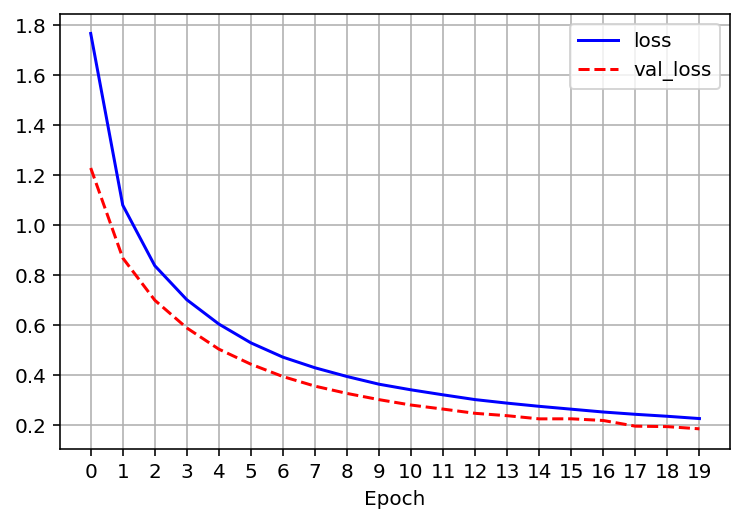

In [15]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.xticks(range(20))
plt.grid()
plt.legend()
plt.show()

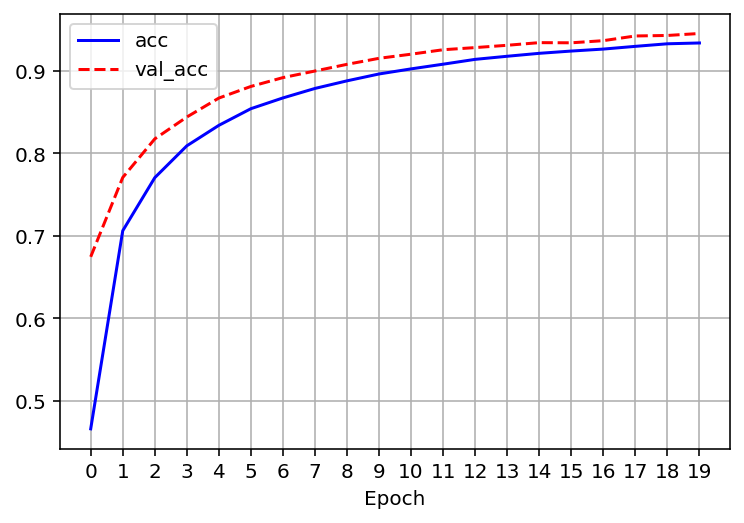

In [16]:
plt.plot(history.history['accuracy'], 'b-', label='acc')
plt.plot(history.history['val_accuracy'], 'r--', label='val_acc')
plt.xlabel('Epoch')
plt.xticks(range(20))
plt.grid()
plt.legend()
plt.show()

In [17]:
func_model.save('./save/func_model')

In [18]:
func_model.save_weights('./save/func_model.skpt')

In [19]:
func_model_2 = keras.models.load_model('./save/func_model')

In [20]:
func_model_2.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1840 - accuracy: 0.9455


[0.18402643501758575, 0.9455000162124634]